In [19]:
#Import or collect your data as appropriate, using OS or an API
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [20]:
#Import or collect your data as appropriate, using OS or an API
#Make and structure your data in a Pandas dataframe
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for i in range(0,39):
    url = 'https://www.metacritic.com/game/playstation-4/crystar/user-reviews?page=' + str(i)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'): 
        if review.find('div', class_='name') == None:
            break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'): 
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
           # print(review.find('span', class_='blurb blurb_expanded').text)
        elif review.find('div',class_='review_body').find('span') == None:
            review_dict['review'].append('No review text.')
           # print("No review")
        else:
            review_dict['review'].append(review.find('div',class_='review_body').find('span').text)

In [21]:
#Make and structure your data in a Pandas dataframe

cs_reviews = pd.DataFrame(review_dict)
print(cs_reviews)

               name          date rating  \
0      c57v76v7v7v6  Aug 10, 2020     10   
1        Starzen517  Jul 24, 2020     10   
2   tesadesrvdbetta  Feb  5, 2020     10   
3          motymurm  Feb 19, 2020      9   
4           WAR1812  Sep  7, 2019      9   
5    Dr4gonkiller96  Oct 24, 2019      9   
6   Cageyanemone007  Sep 19, 2019     10   
7           Danisco  Sep  2, 2019     10   
8        terraxptan  Sep  1, 2019     10   
9              Rod1  Mar 28, 2020      8   
10        Valtiel86  Aug 31, 2019      7   
11    TricksterZero  Sep  8, 2019      7   
12          Hammer7  May 30, 2020      8   
13   AncapMetaleiro  May 13, 2020      6   
14       Laithherzo  Jul 26, 2020      1   
15     shamballa_69  Jul 19, 2020      0   
16       Uzumaki212  Sep 22, 2019      5   
17        DenerMelo  Jul 19, 2020      0   
18          Skapple  Aug  4, 2020      0   
19    Hugegapjungle  Jul  4, 2020      1   
20           Martma  Jul 19, 2020      1   
21  beautifulforest  Oct 14, 202

In [22]:
#Make and structure your data in a Pandas dataframe

import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [23]:
#Use NLTK to tokenize the data, and chart a word cloud

from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_reviews(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [24]:
#Use NLTK to tokenize the data, and chart a word cloud
cleaned_reviews = []
for i in range(0,len(cs_reviews['review'])):
    cleaned_reviews.append(cleaning_reviews((cs_reviews.review[i])))
print(cleaned_reviews[0:10])

['\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad', 'this game amazing with like only one flaw the visuals the atmosphere the gameplay mechanics they all wonderful this game has some really dark themes from suicide miscarriage you explore everything the game you will come across all sorts dark themes when mentioned gameplay mechanics was talking about the memories you get from defeating each enemy and learning their life before they died gameplay itself nothing special decent enough and while found fun the gameplay not being anything deep might not everyone cup tea can also get sort repetitive but for story reasons now the story wow this story such rich and well written story the story very original not ge

In [25]:
#Use NLTK to tokenize the data, and chart a word cloud
#I charted the wordcloud without any relevant stop words first to see what would come out. I then selected my stopwords based on the most
#prominent words that I thought were not particularly useful in learning anything about the game.
#By doing this I seemed to have cluttered my wordcloud with a greater array of less than helpful descriptors.
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["character","game","good","play","end"])

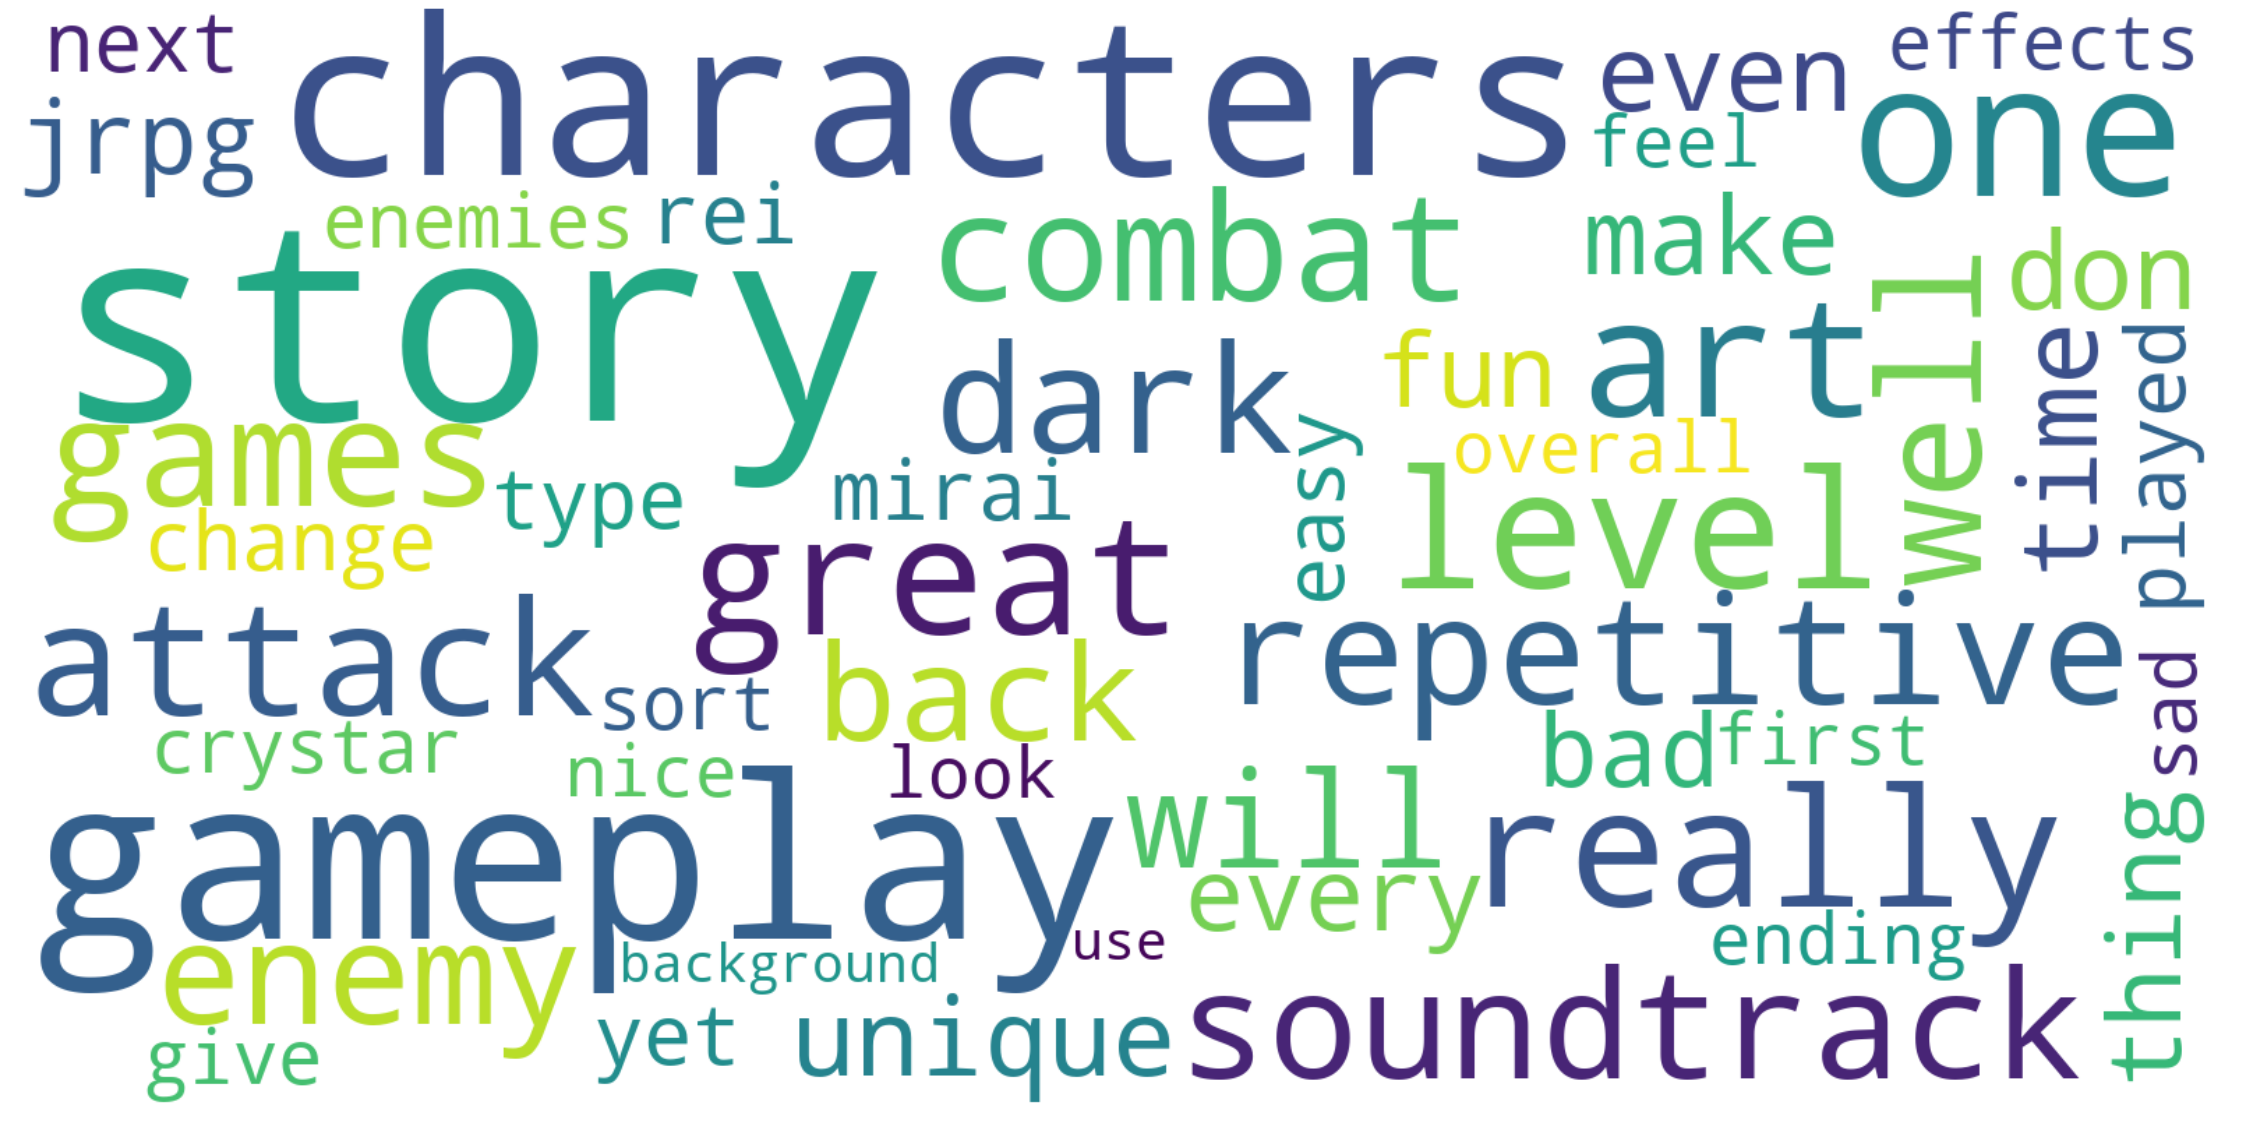

In [26]:
string = pd.Series(cleaned_reviews).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
import numpy as np
from PIL import Image
import random

In [30]:
mask = np.array(Image.open('C:\DesignDevExercises\crystar.jpg'))

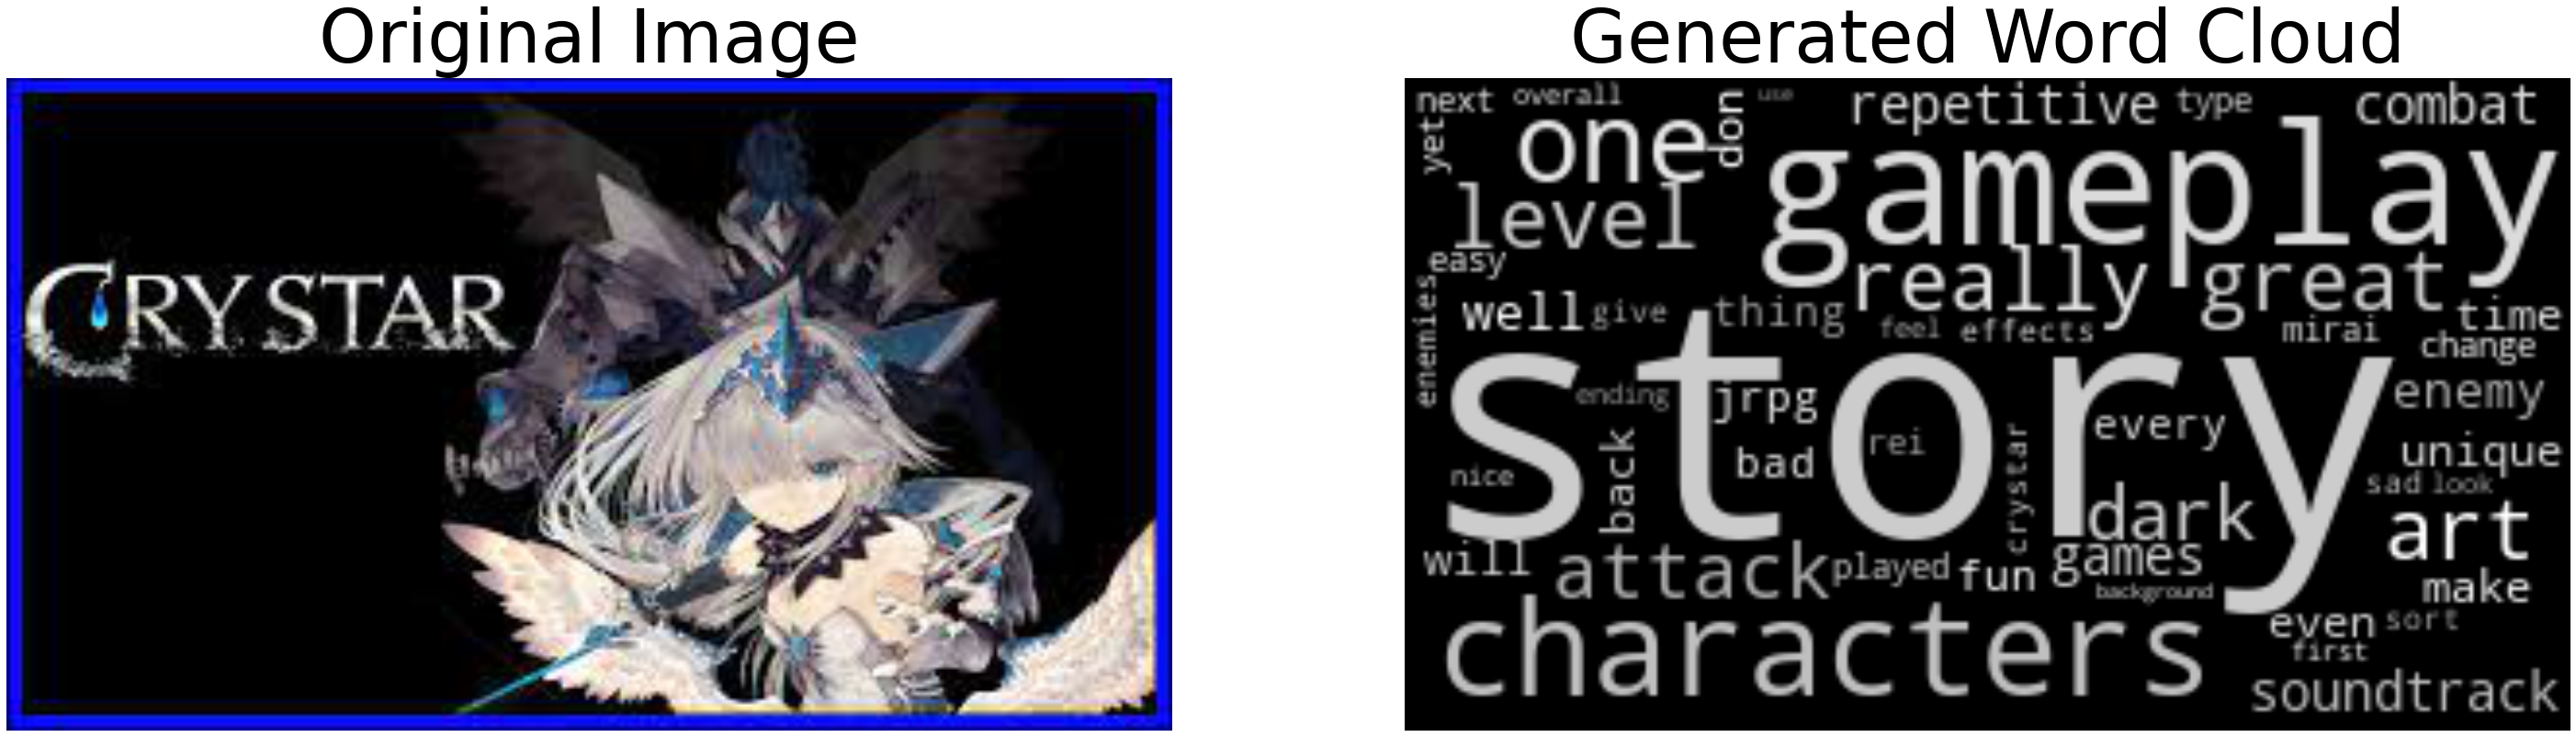

In [31]:
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
plt.title('Original Image', size=80)

plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title('Generated Word Cloud', size=80)
plt.axis("off")
plt.show()